<a href="https://colab.research.google.com/github/GuilhermeCDiniz/analise_ticket_medio_restaurante/blob/main/An%C3%A1lise_Ticket_M%C3%A9dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Configurar estilo dos gráficos
plt.style.use("ggplot")

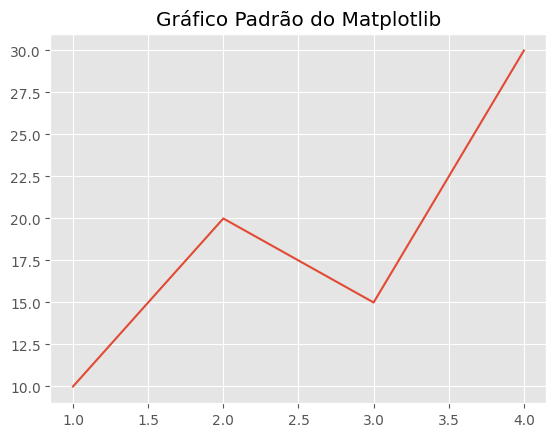

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [10, 20, 15, 30])
plt.title("Gráfico Padrão do Matplotlib")
plt.show()


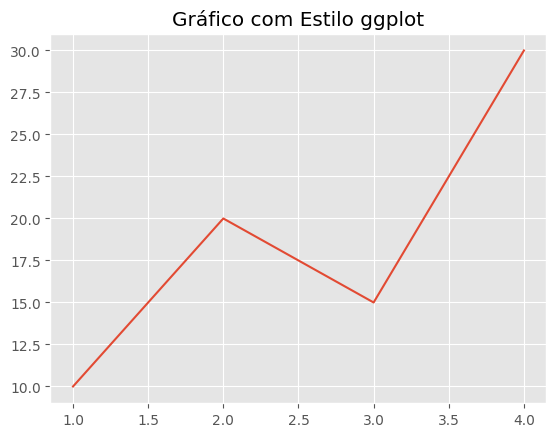

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot([1, 2, 3, 4], [10, 20, 15, 30])
plt.title("Gráfico com Estilo ggplot")
plt.show()


esse comando configura o estilo visual dos gráficos do Matplolib para o tema "ggplot", inspirado no pacote ggplot2 do R

Carregar os dados

In [ ]:
df = pd.read_excel('base_ticket_medio.xlsx')

In [ ]:
df.head()

,Data,Hora,Quantidade_Itens,Valor_Total,Metodo_Pagamento,Campanha,Produto,ID_Cliente
0,2025-01-01,12,7,60.29,Cartão Crédito,Não,Quatro Queijos,Cliente_8
1,2025-01-02,15,10,65.59,Dinheiro,Não,Quatro Queijos,Cliente_5
2,2025-01-03,17,7,5.91,Cartão Débito,Não,Pizza Broto,Cliente_9
3,2025-01-04,20,1,10.67,Pix,Não,Sobremesa,Cliente_3
4,2025-01-05,20,7,9.51,Cartão Débito,Não,Suco Natural,Cliente_11


1️⃣ Cálculo do Ticket Médio

In [ ]:
df["Ticket Medio"] = df["Valor_Total"] / df["Quantidade_Itens"]


2️⃣ Estatística Descritiva

In [ ]:
stats_desc= df["Ticket Medio"].describe()
print(stats_desc)

count     90.000000
mean      15.142899
std       21.347536
min        0.674444
25%        3.154750
50%        7.345857
75%       17.208250
max      121.860000
Name: Ticket Medio, dtype: float64


Esse comando gera estatísticas descritivas para a coluna "Ticket Medio", ajudando a entender a distribuição dos valores.

🔹 .describe() é uma ferramenta poderosa para entender a distribuição dos valores no DataFrame.

Em média, cada item comprado custa 20,0. A variação é entre 15 e 25 para a maioria dos clientes. A menor compra é de 1,25 e a maior é de 37,68

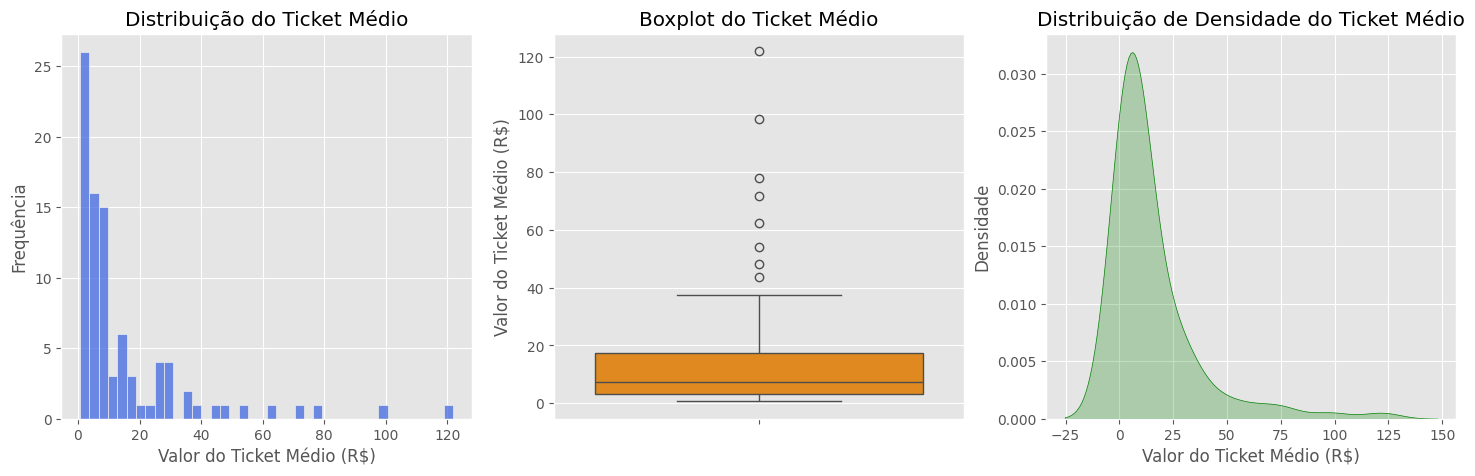

In [ ]:
# Configurar nossos gráficos
fig, axes = plt.subplots(1,3, figsize=(18,5))

#histograma
sns.histplot(df["Ticket Medio"], ax=axes[0],bins=40, color="royalblue")
axes[0].set_title("Distribuição do Ticket Médio")
axes[0].set_xlabel("Valor do Ticket Médio (R$)")
axes[0].set_ylabel("Frequência")

# Boxplot
sns.boxplot(y=df["Ticket Medio"], ax=axes[1], color="darkorange")
axes[1].set_title("Boxplot do Ticket Médio")
axes[1].set_ylabel("Valor do Ticket Médio (R$)")

# Curva de Densidade
sns.kdeplot(df["Ticket Medio"], ax=axes[2], color="green", fill=True)
axes[2].set_title("Distribuição de Densidade do Ticket Médio")
axes[2].set_xlabel("Valor do Ticket Médio (R$)")
axes[2].set_ylabel("Densidade")

# Exibir os gráficos
plt.show()

In [ ]:
# Criando a coluna do dia da semana
df["Dia_da_Semana"] = df["Data"].dt.day_name()

# Conferindo se funcionou
df[[ "Dia_da_Semana"]].head()

,Dia_da_Semana
0,Wednesday
1,Thursday
2,Friday
3,Saturday
4,Sunday


In [ ]:
df["Data"] = pd.to_datetime(df["Data"])

<ipython-input-13-b5cc5d778caf>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Dia_da_Semana", y="Ticket Medio", estimator=np.mean, ci=None, order=dias_ordem, color="royalblue")


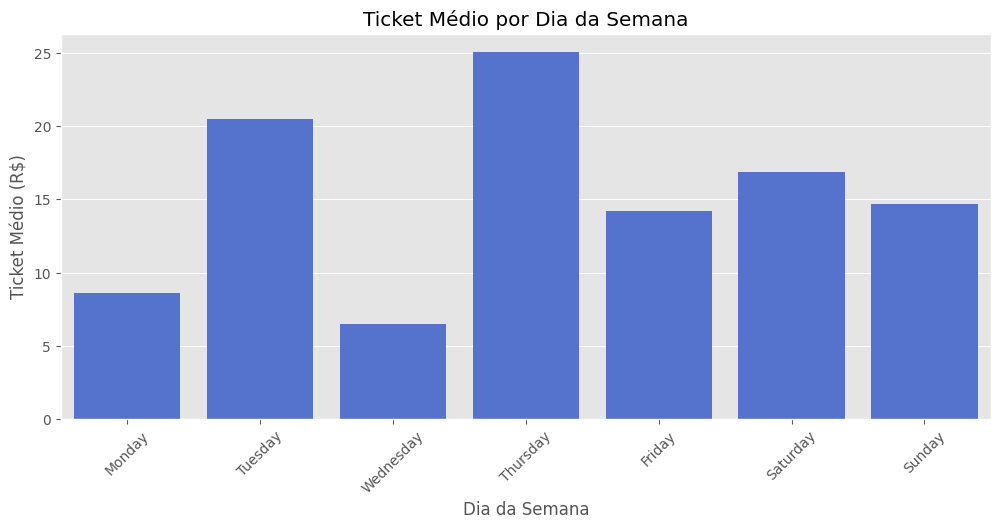

In [ ]:
# Ordenar os dias corretamente
dias_ordem = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12, 5))
sns.barplot(data=df, x="Dia_da_Semana", y="Ticket Medio", estimator=np.mean, ci=None, order=dias_ordem, color="royalblue")
plt.title("Ticket Médio por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Ticket Médio (R$)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-14-11c6e5563614>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Hora", y="Ticket Medio", estimator="mean", ci=None, marker="o", color="red")


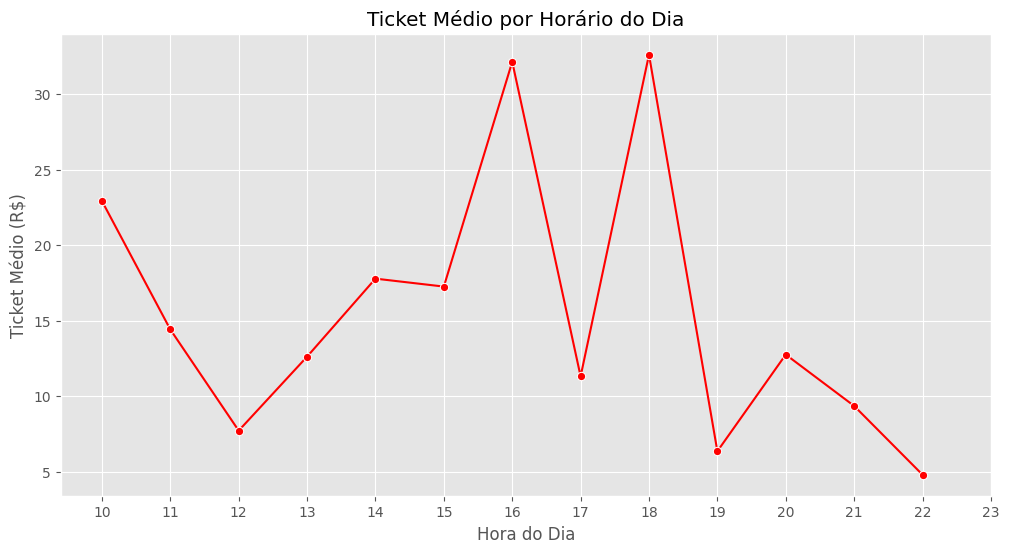

In [ ]:
plt.figure(figsize=(12, 6))

df['Hora'] = pd.to_numeric(df['Hora'], errors='coerce')

sns.lineplot(data=df, x="Hora", y="Ticket Medio", estimator="mean", ci=None, marker="o", color="red")
plt.title("Ticket Médio por Horário do Dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Ticket Médio (R$)")
plt.xticks(range(10, 24))  # Mostrando apenas horários comerciais
plt.grid(True)
plt.show()


<ipython-input-15-ade8d5b07b63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Metodo_Pagamento", y="Ticket Medio", palette="Set2")


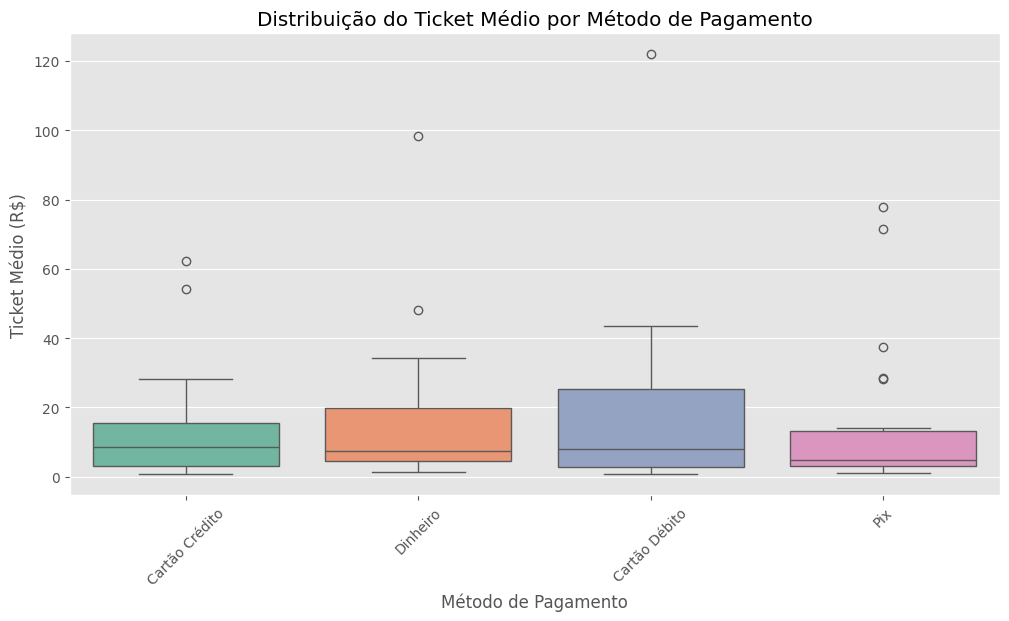

<ipython-input-15-ade8d5b07b63>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Metodo_Pagamento", y="Ticket Medio", estimator=np.mean, ci=None, palette="Set1")
<ipython-input-15-ade8d5b07b63>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Metodo_Pagamento", y="Ticket Medio", estimator=np.mean, ci=None, palette="Set1")


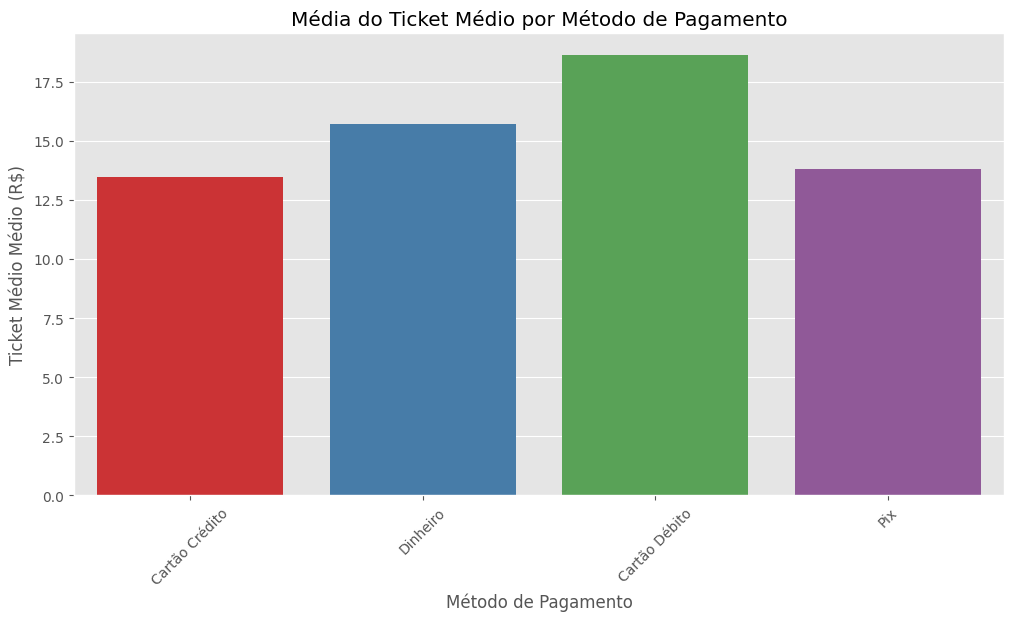

In [ ]:
# Criando um boxplot para visualizar a distribuição do ticket médio por método de pagamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Metodo_Pagamento", y="Ticket Medio", palette="Set2")
plt.title("Distribuição do Ticket Médio por Método de Pagamento")
plt.xlabel("Método de Pagamento")
plt.ylabel("Ticket Médio (R$)")
plt.xticks(rotation=45)
plt.show()

# Criando um gráfico de barras para visualizar a média do ticket médio por método de pagamento
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Metodo_Pagamento", y="Ticket Medio", estimator=np.mean, ci=None, palette="Set1")
plt.title("Média do Ticket Médio por Método de Pagamento")
plt.xlabel("Método de Pagamento")
plt.ylabel("Ticket Médio Médio (R$)")
plt.xticks(rotation=45)
plt.show()



🔥 RFV - Segmentação de Clientes

In [ ]:
# 1. Preparar a base
df["Data"] = pd.to_datetime(df["Data"])
data_ref = df["Data"].max()

# 2. Calcular Recência, Frequência e Valor
df_rfm = df.groupby("ID_Cliente").agg({
    "Data": lambda x: (data_ref - x.max()).days,
    "ID_Cliente": "count",
    "Valor_Total": "sum"
}).rename(columns={
    "Data": "Recencia",
    "ID_Cliente": "Frequencia",
    "Valor_Total": "Valor"
})

# 3. Criar notas RFM de forma simples (com .rank)
df_rfm["R_Nota"] = df_rfm["Recencia"].rank(method="first", ascending=True)
df_rfm["F_Nota"] = df_rfm["Frequencia"].rank(method="first", ascending=False)
df_rfm["M_Nota"] = df_rfm["Valor"].rank(method="first", ascending=False)

# Normalizar notas para escala 1 a 5
df_rfm["R_Nota"] = pd.qcut(df_rfm["R_Nota"], 5, labels=[1,2,3,4,5])
df_rfm["F_Nota"] = pd.qcut(df_rfm["F_Nota"], 5, labels=[1, 2, 3, 4, 5])
df_rfm["M_Nota"] = pd.qcut(df_rfm["M_Nota"], 5, labels=[1, 2, 3, 4, 5])

# 4. Score final
df_rfm["RFM_Score"] = (
    df_rfm["R_Nota"].astype(int) * 1 +
    df_rfm["F_Nota"].astype(int) * 2 +
    df_rfm["M_Nota"].astype(int) * 2
)

# 5. Segmentação simples
def segmentar(rfm):
    if rfm >= 30:
        return "Cliente VIP"
    elif rfm >= 15:
        return "Cliente Leal"
    elif rfm >= 10:
        return "Cliente Regular"
    else:
        return "Cliente em Risco"

df_rfm["Segmento"] = df_rfm["RFM_Score"].apply(segmentar)


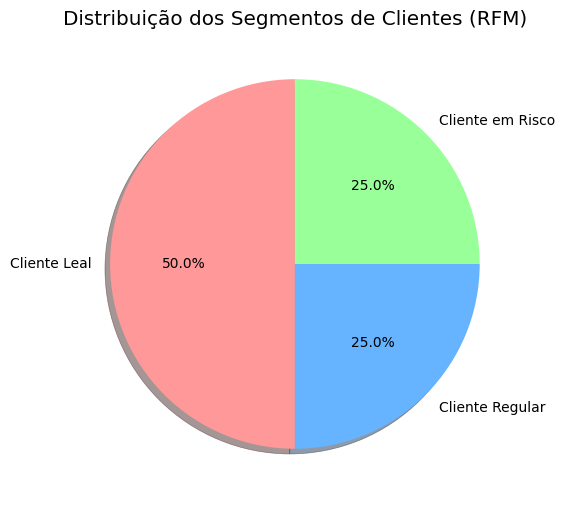

In [ ]:
df_rfm["Segmento"].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    figsize=(6, 6),
    colors=["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]
)
plt.title("Distribuição dos Segmentos de Clientes (RFM)")
plt.ylabel("")
plt.show()

<ipython-input-46-7f10255ba2b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Segmento", data=df_rfm, order=df_rfm["Segmento"].value_counts().index, palette="Set2")


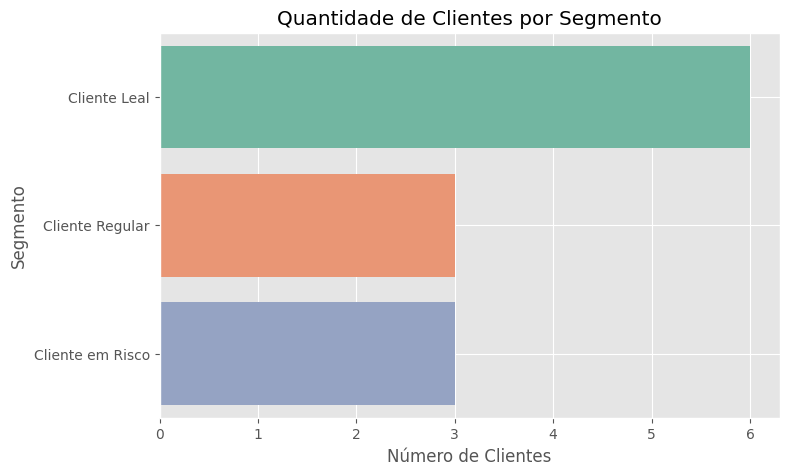

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(y="Segmento", data=df_rfm, order=df_rfm["Segmento"].value_counts().index, palette="Set2")
plt.title("Quantidade de Clientes por Segmento")
plt.xlabel("Número de Clientes")
plt.ylabel("Segmento")
plt.grid(True)
plt.show()


<ipython-input-41-30bdd48b32a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_completo, x="Segmento", y="Valor_Total", palette="coolwarm")


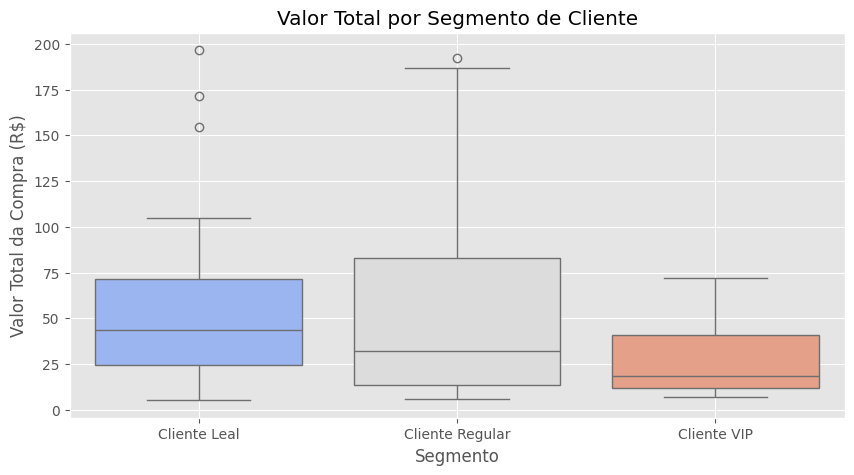

In [ ]:
# Mesclar RFM com a base original
df_completo = df.merge(df_rfm[["RFM_Score", "Segmento"]], left_on="ID_Cliente", right_index=True)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_completo, x="Segmento", y="Valor_Total", palette="coolwarm")
plt.title("Valor Total por Segmento de Cliente")
plt.xlabel("Segmento")
plt.ylabel("Valor Total da Compra (R$)")
plt.grid(True)
plt.show()


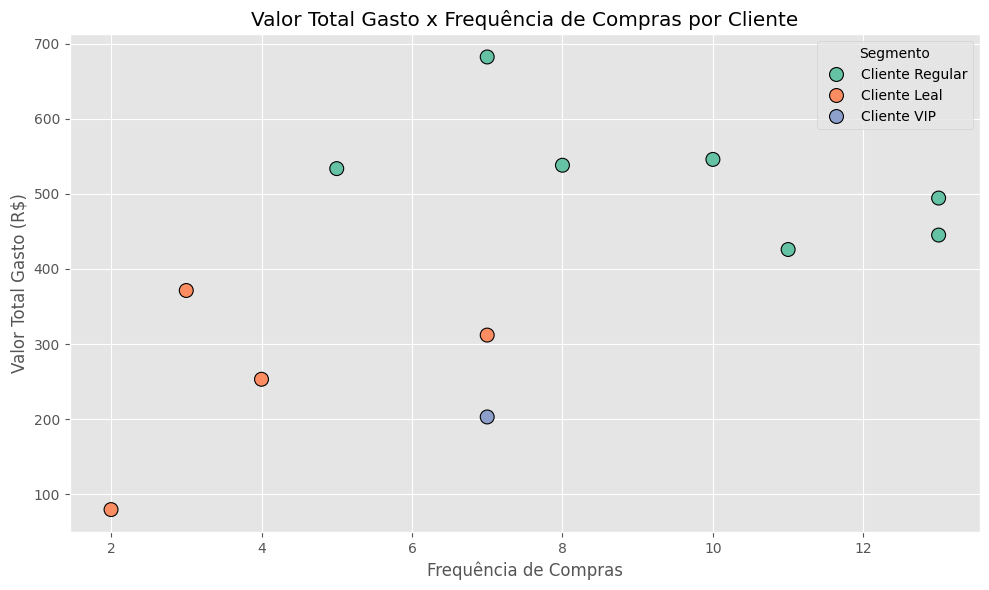

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_rfm,
    x="Frequencia",
    y="Valor",
    hue="Segmento",
    palette="Set2",
    s=100,
    edgecolor="black"
)

plt.title("Valor Total Gasto x Frequência de Compras por Cliente")
plt.xlabel("Frequência de Compras")
plt.ylabel("Valor Total Gasto (R$)")
plt.legend(title="Segmento")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
data_ref = df["Data"].max()
print(data_ref)

2025-03-31 00:00:00


In [ ]:
df_rfm = df.groupby("ID_Cliente").agg({
    "Data": lambda x: (data_ref - x.max()).days,  # Dias desde a última compra
    "ID_Cliente": "count",  # Número de compras feitas
    "Valor_Total": "sum"  # Total gasto pelo cliente
})


In [ ]:
df_rfm = df_rfm.rename(columns={"Data": "Recencia", "ID_Cliente": "Frequencia", "Valor_Total": "Valor"})

In [ ]:
# Criar pontuações para cada métrica
df_rfm["R_Nota"] = pd.qcut(df_rfm["Recencia"], 5, labels=[1,2,3,4,5])
df_rfm["F_Nota"] = pd.qcut(df_rfm["Frequencia"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
df_rfm["M_Nota"] = pd.qcut(df_rfm["Valor"], 5, labels=[1, 2, 3, 4, 5])

df_rfm["RFM_Score"] = (
    df_rfm["R_Nota"].astype(int)
    + df_rfm["F_Nota"].astype(int)
    + df_rfm["M_Nota"].astype(int)
)

# Exibir os segmentos
print(df_rfm.head())


            Recencia  Frequencia   Valor R_Nota F_Nota M_Nota  RFM_Score  \
ID_Cliente                                                                 
Cliente_1          3           7  682.25      2      2      5          9   
Cliente_10        20           3  371.36      5      1      2          8   
Cliente_11         1           7  203.02      1      3      1          5   
Cliente_12        56           2   79.68      5      1      1          7   
Cliente_2         36           4  253.17      5      1      1          7   

                    Segmento  
ID_Cliente                    
Cliente_1       Cliente Leal  
Cliente_10   Cliente Regular  
Cliente_11  Cliente em Risco  
Cliente_12   Cliente Regular  
Cliente_2    Cliente Regular  


In [ ]:
def classificar_cliente(rfm):
    if rfm["RFM_Score"] >= 12:
        return "Cliente VIP"
    elif rfm["RFM_Score"] >= 9:
        return "Cliente Leal"
    elif rfm["RFM_Score"] >= 6:
        return "Cliente Regular"
    else:
        return "Cliente em Risco"

df_rfm["Segmento"] = df_rfm.apply(classificar_cliente, axis=1)


In [ ]:
df_rfm.sort_values("RFM_Score", ascending=False).head(10)


,Recencia,Frequencia,Valor,R_Nota,F_Nota,M_Nota,RFM_Score,Segmento
ID_Cliente,,,,,,,,
Cliente_5,8,8,538.12,3,4,5,12,Cliente VIP
Cliente_4,7,11,425.93,3,5,3,11,Cliente Leal
Cliente_6,5,13,445.15,2,5,3,10,Cliente Leal
Cliente_3,2,13,494.41,1,5,4,10,Cliente Leal
Cliente_9,0,10,545.87,1,4,5,10,Cliente Leal
Cliente_7,11,5,533.62,4,2,4,10,Cliente Leal
Cliente_8,10,7,312.00,4,3,2,9,Cliente Leal
Cliente_1,3,7,682.25,2,2,5,9,Cliente Leal
Cliente_10,20,3,371.36,5,1,2,8,Cliente Regular


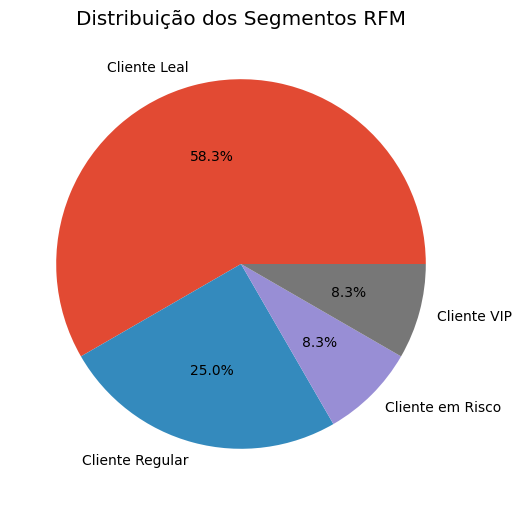

In [ ]:
df_rfm["Segmento"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6, 6))
plt.title("Distribuição dos Segmentos RFM")
plt.ylabel("")
plt.show()


In [ ]:
print(df[["Produto"]].head(10))  # Exibir os primeiros produtos
print(df["Produto"].value_counts())  # Verificar se há pedidos com mais de um produto


               Produto
0         Suco Natural
1          Pizza Broto
2          Pizza Broto
3  Frango com Catupiry
4            Mussarela
5           Portuguesa
6           Marguerita
7          Pizza Broto
8            Sobremesa
9            Mussarela
Produto
Cerveja                65
Sobremesa              64
Água                   62
Suco Natural           60
Calabresa              59
Refrigerante 2L        56
Mussarela              54
Pizza Broto            53
Quatro Queijos         52
Marguerita             49
Frango com Catupiry    46
Portuguesa             41
Name: count, dtype: int64


In [ ]:
import random

# Simulando compras com múltiplos produtos (máximo de 3 produtos por pedido)
produtos_disponiveis = df["Produto"].unique()

df["Produtos_List"] = df["Produto"].apply(lambda x: random.sample(list(produtos_disponiveis), k=random.randint(1, 3)))

# Exibir amostra para ver se há múltiplos produtos agora
print(df[["Produtos_List"]].head(10))


                        Produtos_List
0     [Sorvete, Salada, Refrigerante]
1          [Pizza, Sushi, Hamburguer]
2   [Hamburguer, Refrigerante, Sushi]
3            [Pizza, Sorvete, Salada]
4  [Hamburguer, Salada, Refrigerante]
5                             [Sushi]
6                      [Refrigerante]
7                 [Sushi, Hamburguer]
8                             [Sushi]
9          [Refrigerante, Hamburguer]


In [ ]:
from itertools import combinations
from collections import Counter

# Criando pares de produtos comprados juntos
combinacoes = []
for lista in df["Produtos_List"]:
    if len(lista) > 1:  # Só cria pares se houver mais de um produto no pedido
        combinacoes.extend(combinations(lista, 2))

# Contar pares mais frequentes
contagem_combinacoes = Counter(combinacoes)

# Criando um DataFrame com os pares mais comprados juntos
df_cross_sell = pd.DataFrame(contagem_combinacoes.items(), columns=["Par_Produtos", "Frequencia"])
df_cross_sell = df_cross_sell.sort_values(by="Frequencia", ascending=False)

# Exibir os pares mais comprados juntos
print("📊 Top produtos comprados juntos (Cross-Sell):")
print(df_cross_sell.head(10))

📊 Top produtos comprados juntos (Cross-Sell):
                  Par_Produtos  Frequencia
3               (Pizza, Sushi)         526
2       (Salada, Refrigerante)         505
8        (Refrigerante, Sushi)         497
10             (Pizza, Salada)         488
7          (Hamburguer, Sushi)         485
13         (Hamburguer, Pizza)         485
14       (Refrigerante, Pizza)         480
24        (Salada, Hamburguer)         478
12  (Refrigerante, Hamburguer)         474
1      (Sorvete, Refrigerante)         474


In [ ]:
# Calculando o ticket médio por produto
df_upsell = df.groupby("Produto")["Ticket Medio"].mean().reset_index()
df_upsell = df_upsell.sort_values(by="Ticket Medio", ascending=False)

# Exibir os produtos que podem ser usados para upsell
print("📊 Top produtos com maior ticket médio (Upsell):")
print(df_upsell.head(10))


📊 Top produtos com maior ticket médio (Upsell):
        Produto  Ticket Medio
1         Pizza     20.113888
3        Salada     20.113879
4       Sorvete     20.092428
2  Refrigerante     19.972216
5         Sushi     19.886728
0    Hamburguer     19.813355


In [ ]:
# Calculando o ticket médio por produto
df_upsell = df.groupby("Produto")["Ticket Medio"].mean().reset_index()
df_upsell = df.sort_values(by="Ticket Medio", ascending=False)

# Exibir os produtos que podem ser usados para upsell
print("📊 Top produtos com maior ticket médio (Upsell):")
print(df_upsell.head(10))


📊 Top produtos com maior ticket médio (Upsell):
            Data  Hora  Quantidade_Itens  Valor_Total   Metodo_Pagamento  \
8282  2024-03-16    20                 7       263.78   Cartão de Débito   
569   2024-01-05    16                 4       146.71                Pix   
6450  2024-02-28    12                 9       328.32  Cartão de Crédito   
3698  2024-02-04    20                 1        36.40                Pix   
10211 2024-03-31    15                 9       325.03                Pix   
9402  2024-03-25    10                 5       179.83   Cartão de Débito   
1355  2024-01-14    19                 4       142.78                Pix   
9586  2024-03-27    10                 6       213.97   Cartão de Débito   
5708  2024-02-22    23                10       355.16   Cartão de Débito   
2580  2024-01-24    14                 4       140.39           Dinheiro   

      Campanha       Produto  Ticket Medio Dia_da_Semana  \
8282       Sim  Refrigerante     37.682857      Saturda

In [ ]:
# Criando recomendações baseadas nos dados
cross_sell_recommendations = df_cross_sell.head(5)  # Pegamos os 5 pares mais vendidos juntos
upsell_recommendations = df_upsell.head(5)  # Pegamos os 5 produtos com maior ticket médio

print("\n📌 Recomendações de Cross-Sell:")
for _, row in cross_sell_recommendations.iterrows():
    print(f"🔹 Se o cliente comprou {row['Par_Produtos'][0]}, sugira também {row['Par_Produtos'][1]} (Frequência: {row['Frequencia']})")

print("\n📌 Recomendações de Upsell:")
for _, row in upsell_recommendations.iterrows():
    print(f"🔺 Para clientes comprando {row['Produto']}, sugira um upgrade! Ticket médio: R$ {row['Ticket Medio']:.2f}")



📌 Recomendações de Cross-Sell:
🔹 Se o cliente comprou Pizza, sugira também Sushi (Frequência: 526)
🔹 Se o cliente comprou Salada, sugira também Refrigerante (Frequência: 505)
🔹 Se o cliente comprou Refrigerante, sugira também Sushi (Frequência: 497)
🔹 Se o cliente comprou Pizza, sugira também Salada (Frequência: 488)
🔹 Se o cliente comprou Hamburguer, sugira também Sushi (Frequência: 485)

📌 Recomendações de Upsell:
🔺 Para clientes comprando Refrigerante, sugira um upgrade! Ticket médio: R$ 37.68
🔺 Para clientes comprando Sorvete, sugira um upgrade! Ticket médio: R$ 36.68
🔺 Para clientes comprando Pizza, sugira um upgrade! Ticket médio: R$ 36.48
🔺 Para clientes comprando Sorvete, sugira um upgrade! Ticket médio: R$ 36.40
🔺 Para clientes comprando Sushi, sugira um upgrade! Ticket médio: R$ 36.11


In [ ]:
print("\n📌 **Plano de Ação para Aumentar Ticket Médio**\n")

# Sugestões para cross-sell
print("🔹 **Cross-Sell** (Sugestões de produtos frequentemente comprados juntos):")
for _, row in cross_sell_recommendations.iterrows():
    print(f"➡️ Se o cliente comprar {row['Par_Produtos'][0]}, sugerir também {row['Par_Produtos'][1]} (Frequência: {row['Frequencia']})")

# Sugestões para upsell
print("\n🔺 **Upsell** (Sugestões de produtos premium com ticket médio alto):")
for _, row in upsell_recommendations.iterrows():
    print(f"⬆️ Se o cliente comprar {row['Produto']}, sugerir uma versão premium! Ticket médio: R$ {row['Ticket Medio']:.2f}")

# Estratégias de aplicação
print("\n📌 **Ações para Implementação:**")
print("✅ Criar combos no cardápio baseados em cross-sell.")
print("✅ Implementar sugestões automáticas no checkout para aumentar o ticket médio.")
print("✅ Testar descontos progressivos para incentivar compras maiores.")
print("✅ Oferecer brindes para clientes que gastam acima do valor médio.")



📌 **Plano de Ação para Aumentar Ticket Médio**

🔹 **Cross-Sell** (Sugestões de produtos frequentemente comprados juntos):
➡️ Se o cliente comprar Pizza, sugerir também Sushi (Frequência: 526)
➡️ Se o cliente comprar Salada, sugerir também Refrigerante (Frequência: 505)
➡️ Se o cliente comprar Refrigerante, sugerir também Sushi (Frequência: 497)
➡️ Se o cliente comprar Pizza, sugerir também Salada (Frequência: 488)
➡️ Se o cliente comprar Hamburguer, sugerir também Sushi (Frequência: 485)

🔺 **Upsell** (Sugestões de produtos premium com ticket médio alto):
⬆️ Se o cliente comprar Refrigerante, sugerir uma versão premium! Ticket médio: R$ 37.68
⬆️ Se o cliente comprar Sorvete, sugerir uma versão premium! Ticket médio: R$ 36.68
⬆️ Se o cliente comprar Pizza, sugerir uma versão premium! Ticket médio: R$ 36.48
⬆️ Se o cliente comprar Sorvete, sugerir uma versão premium! Ticket médio: R$ 36.40
⬆️ Se o cliente comprar Sushi, sugerir uma versão premium! Ticket médio: R$ 36.11

📌 **Ações para 